<a href="https://colab.research.google.com/github/Vik-Gt-321/Aerospace-Codes/blob/main/Landing%20shuttle%20recovery%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.integrate import odeint
import numpy as np

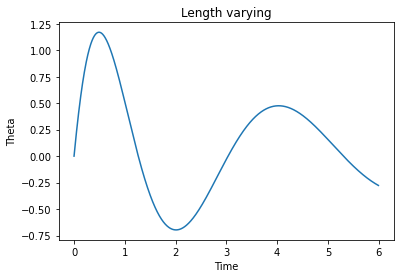

In [ ]:
from math import pi
from numpy import arange
import matplotlib.pyplot as plt
import math

g = 9.8
l = 1
w = 2
X = 1
Y = 1
r = 0.5
ax = 5
ay = 5
# y' = u
# u' = -y
# ml2 ¨θ + ml(g − Y¨ ) sin θ + mlX¨ cos θ ## Lag eqn

c = 1

def F(y, u, x): #(y, u, t)
  # return  -g/l*y + w*w*X/l*math.cos(w*x)     ## Horizontal periodic motion
  #return  (-g/l + w*w*Y/l*math.cos(w*x) )*y
  #return -l*y*(g + r*w*w*math.cos(w*x)) + l*r*w*w*math.sin(w*x)
  # return -g*y/l - ax/l ## Horizontal acc
  # return -(g-ay)/l*y
  l = 1 + c*x
  return -g*y/l - 2*u/l
  # return -g*y - 2*math.sin(x)*u

a = 0
b = 6
N = 1000
h = (b-a)/N

xpoints = arange(a,b,h)
ypoints = []
upoints = []

y = 0.0
u = 5

for x in xpoints:
    ypoints.append(y)
    upoints.append(u)

    m1 = h*u
    k1 = h*F(y, u, x)  #(x, v, t)

    m2 = h*(u + 0.5*k1)
    k2 = h*F(y+0.5*m1, u+0.5*k1, x+0.5*h)

    m3 = h*(u + 0.5*k2)
    k3 = h*F(y+0.5*m2, u+0.5*k2, x+0.5*h)

    m4 = h*(u + k3)
    k4 = h*F(y+m3, u+k3, x+h)

    y += (m1 + 2*m2 + 2*m3 + m4)/6
    u += (k1 + 2*k2 + 2*k3 + k4)/6

plt.plot(xpoints, ypoints)
plt.title("Length varying")
plt.xlabel("Time")
plt.ylabel("Theta")
plt.show()

In [ ]:
l = 5
h = 3
l2 = 3*h/4
m = 400
I = m*h*h*0.3375
g = 9.8

In [ ]:
t = np.linspace(0,10, 1000)

In [ ]:
def fun(y, t):
  theta1,  theta2, omega1, omega2 = y #what order 
  # print("theta1, theta2, w1, w1: ", theta1,  theta2, omega1, omega2 )
  c = 0.1
  l1 = l - c*t
  l1_dot = -c
  # print("l1, l1_dot: ", l1, l1_dot)

  a1 = l2*np.cos(theta1 - theta2)/l1
  # print("a1: ", a1)

  a2 = m*l1*l2*math.cos(theta1 - theta2)/(I + m*l2*l2)
  # print("a2: ", a2)

  f1 = -g/l1*math.sin(theta1) - 2*l1_dot*omega1/l1 - l1_dot*l2*omega2*math.cos(theta1 - theta2)/(l1*l1) -l2/l1*omega2*omega2*math.sin(theta1 - theta2)
  # print("f1: ", f1)


  f2 = ( -m*g*l2*math.sin(theta2) + m*l1*l2*omega1*omega1*math.sin(theta1 - theta2) 
        - m*l1_dot*omega1*l2*math.cos(theta1 - theta2) )/(I + m*l2*l2)
  # print("f2: ", f2)

  den = 1-a1*a2
  # print("den: ", den)

  omega1_dot = (f1 - a1*f2)/den

  omega2_dot = (f2 - a2*f1)/den


  return [omega1, omega2, omega1_dot,  omega2_dot] # what order

In [ ]:
math.sin(math.pi/4)

0.7071067811865475

In [ ]:
initial1 = [math.pi/36,0, 0 , 0]
initial2 = [math.pi/90,0, 0 , 0]


In [ ]:
fun(initial1, 0)

[0, 0, -0.44983896158679465, 0.6223988729553628]

In [ ]:
t1t21= odeint(fun, initial1, t, full_output = 1)
t1t22 = odeint(fun, initial2, t, full_output = 1)

In [ ]:
t1t21[0].shape

(1000, 4)

In [ ]:
# t1t2[1]

In [ ]:
# thet1 = []
# thet2 = []
# omeg1 = []
# omeg2 = []
# for [a, b, c, d] in xyz:   # what order does it return
#   thet1.append(a)
#   thet2.append(b)
#   omeg1.append(c)
#   omeg2.append(d)

In [ ]:
thet11 = t1t21[0][:, 0]
thet21= t1t21[0][:, 1]
omeg11 = t1t21[0][:, 2]
omeg21 = t1t21[0][:, 3]

In [ ]:
thet12= t1t22[0][:, 0]
thet22= t1t22[0][:, 1]
omeg12 = t1t22[0][:, 2]
omeg22 = t1t22[0][:, 3]

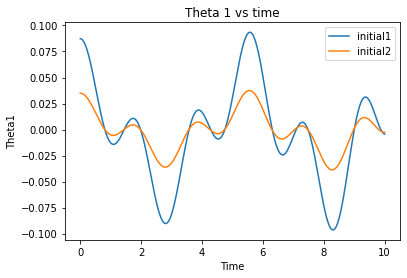

In [ ]:
plt.plot(t, thet11)
plt.plot(t, thet12)

plt.title("Theta 1 vs time")
plt.xlabel("Time")
plt.ylabel("Theta1")
plt.legend(["initial1", "initial2"])

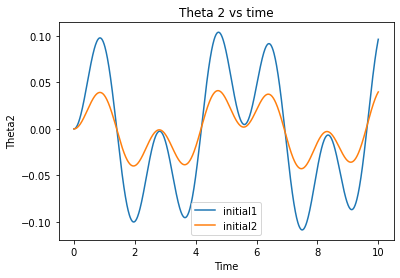

In [ ]:
plt.plot(t, thet21)
plt.plot(t, thet22)

plt.title("Theta 2 vs time")
plt.xlabel("Time")
plt.ylabel("Theta2")
plt.legend(["initial1", "initial2"])

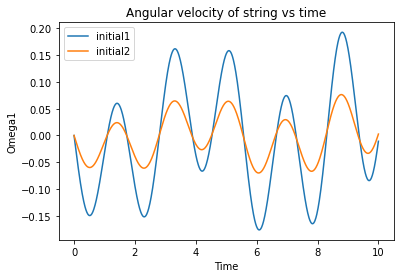

In [ ]:
plt.plot(t, omeg11)
plt.plot(t, omeg12)

plt.title("Angular velocity of string vs time")
plt.xlabel("Time")
plt.ylabel("Omega1")
plt.legend(["initial1", "initial2"])

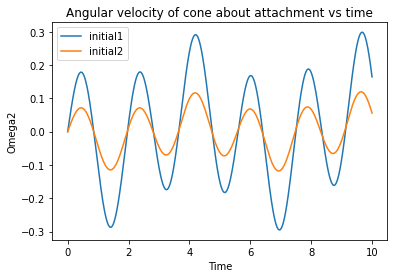

In [ ]:
plt.plot(t, omeg21)
plt.plot(t, omeg22)

plt.title("Angular velocity of cone about attachment vs time")
plt.xlabel("Time")
plt.ylabel("Omega2")
plt.legend(["initial1", "initial2"])